In [1]:
from thop import profile
import torch 
import matplotlib.pyplot as plt
from CSIEncoder import CSIEncoder
from CSIFormer import CSIFormer
from CSIFormerStudent import CSIFormerStudent
from eqDnnPro import DNNResEQWithAttention
from eqDnnProStudent import DNNResEQWithAttentionStudent
import numpy as np

Teacher Model total trainable parameters: 7379464
Student Model total trainable parameters: 2117128


In [2]:
csi_ls = torch.randn((1,224,14,2,2,2)) 
csi_ls_pre = torch.randn((1,2,224,14,2,2,2))
csi_est = torch.randn((1,224,14,2,2,2)) 
tx_signal = torch.randn((1,224,14,2,2))
rx_signal = torch.randn((1,224,14,2,2))

In [3]:
CSIEncoder_model = CSIEncoder()
CSIFormer_model = CSIFormer()
CSIFormerStudent_model = CSIFormerStudent()
DNNResEQWithAttention_model = DNNResEQWithAttention()
DNNResEQWithAttentionStudent_model = DNNResEQWithAttentionStudent()
# 计算参数量
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# 计算并打印各个模型的参数数量
print("CSIFormer_model 参数量:", count_parameters(CSIFormer_model))
print("CSIFormerStudent_model 参数量:", count_parameters(CSIFormerStudent_model))
print("DNNResEQWithAttention_model 参数量:", count_parameters(DNNResEQWithAttention_model))
print("DNNResEQWithAttentionStudent_model 参数量:", count_parameters(DNNResEQWithAttentionStudent_model))


CSIFormer_model 参数量: 7379464
CSIFormerStudent_model 参数量: 2117128
DNNResEQWithAttention_model 参数量: 3693852
DNNResEQWithAttentionStudent_model 参数量: 531996


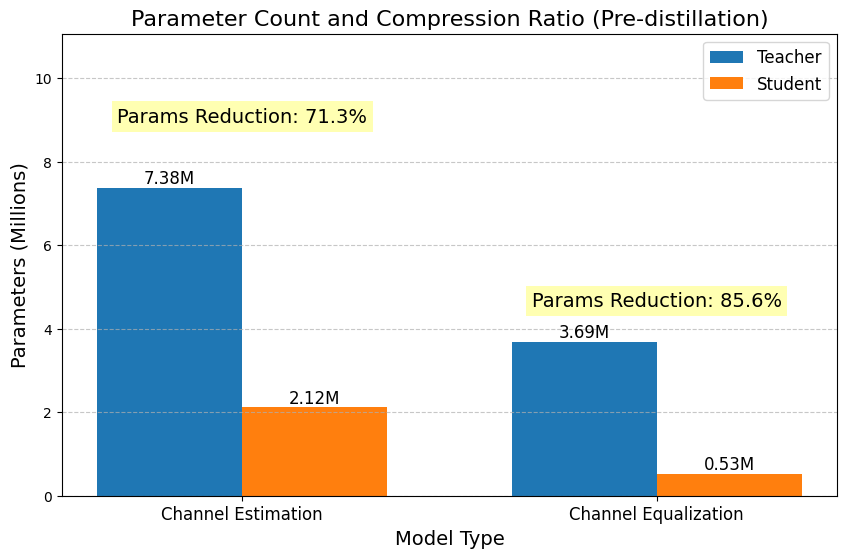

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define model parameter counts (raw numbers)
# Channel Estimation Model
CSIFormer_teacher = 7379464    # Teacher
CSIFormer_student = 2117128    # Student

# Channel Equalization Model
DNNResEQ_teacher = 3693852     # Teacher
DNNResEQ_student = 531996      # Student

# Convert to millions for display
teacher_params = [CSIFormer_teacher / 1e6, DNNResEQ_teacher / 1e6]
student_params = [CSIFormer_student / 1e6, DNNResEQ_student / 1e6]

# Calculate compression ratios (percentage reduction)
compression_ratios = [ ((t - s) / t * 100) for t, s in zip(teacher_params, student_params) ]

# Define the categories (model types)
categories = ['Channel Estimation', 'Channel Equalization']

# Set the positions for the groups
x = np.arange(len(categories))
bar_width = 0.35

# Define contrasting colors (blue for Teacher, orange for Student)
teacher_color = '#1f77b4'  # Blue
student_color = '#ff7f0e'  # Orange

plt.figure(figsize=(10, 6))

# Plot bars for teacher and student models side-by-side
bars_teacher = plt.bar(x - bar_width/2, teacher_params, width=bar_width, 
                         color=teacher_color, label='Teacher')
bars_student = plt.bar(x + bar_width/2, student_params, width=bar_width, 
                         color=student_color, label='Student')

# Add numerical labels on top of each bar
for bar in bars_teacher:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}M', ha='center', va='bottom', fontsize=12)

for bar in bars_student:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}M', ha='center', va='bottom', fontsize=12)

# Annotate compression ratio above each group with highlight
for i, (t_param, comp) in enumerate(zip(teacher_params, compression_ratios)):
    plt.text(x[i], t_param * 1.2, f'Params Reduction: {comp:.1f}%', 
             ha='center', va='bottom', fontsize=14, color='black',
             bbox=dict(facecolor='yellow', alpha=0.3, edgecolor='none'))

# Set axis labels and title in English
plt.xlabel('Model Type', fontsize=14)
plt.ylabel('Parameters (Millions)', fontsize=14)
plt.title('Parameter Count and Compression Ratio (Pre-distillation)', fontsize=16)
plt.xticks(x, categories, fontsize=12)

# Add legend
plt.legend(fontsize=12)

# Add horizontal grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust y-axis limit to leave room for annotations
plt.ylim(0, max(teacher_params) * 1.5)

plt.show()


In [5]:
flops, params = profile(CSIEncoder_model, inputs=(csi_ls, ))
print("参数量params: %.2fM  计算量flops: %.2fG" % (params / (1000 ** 2), flops / (1000 ** 3)))

[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.normalization.LayerNorm'>.
参数量params: 2.11M  计算量flops: 6.62G


In [6]:
flops, params = profile(CSIFormer_model, inputs=(csi_ls,csi_ls_pre))
print("参数量params: %.2fM  计算量flops: %.2fG" % (params / (1000 ** 2), flops / (1000 ** 3)))

[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.normalization.LayerNorm'>.
参数量params: 4.22M  计算量flops: 13.24G


In [7]:
flops, params = profile(CSIFormerStudent_model, inputs=(csi_ls,csi_ls_pre))
print("参数量params: %.2fM  计算量flops: %.2fG" % (params / (1000 ** 2), flops / (1000 ** 3)))

[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.normalization.LayerNorm'>.
参数量params: 0.54M  计算量flops: 1.70G


In [8]:
flops, params = profile(DNNResEQWithAttention_model, inputs=(csi_est,rx_signal))
print("参数量params: %.2fM  计算量flops: %.2fG" % (params / (1000 ** 2), flops / (1000 ** 3)))

[INFO] Register count_normalization() for <class 'torch.nn.modules.normalization.LayerNorm'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
参数量params: 2.64M  计算量flops: 8.28G


In [9]:
flops, params = profile(DNNResEQWithAttentionStudent_model, inputs=(csi_est,rx_signal))
print("参数量params: %.2fM  计算量flops: %.2fG" % (params / (1000 ** 2), flops / (1000 ** 3)))

[INFO] Register count_normalization() for <class 'torch.nn.modules.normalization.LayerNorm'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
参数量params: 0.47M  计算量flops: 1.46G


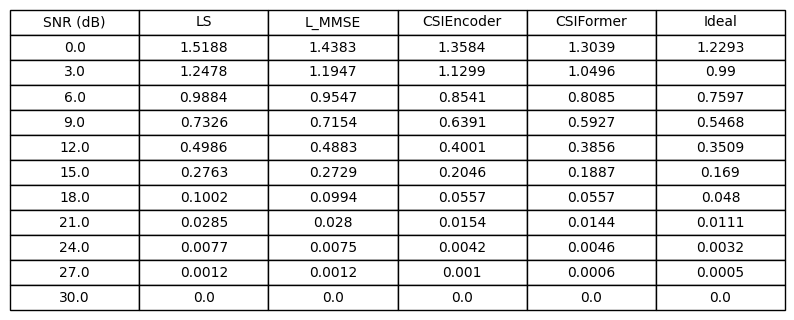

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 数据定义（每列 11 个数据点）
data = {
    'SNR (dB)': [0, 3, 6, 9, 12, 15, 18, 21, 24, 27],
    'LS': [1.5188, 1.2478, 0.9884, 0.7326, 0.4986, 0.2763, 0.1002, 0.0285, 0.0077, 0.0012],
    'L_MMSE': [1.4383, 1.1947, 0.9547, 0.7154, 0.4883, 0.2729, 0.0994, 0.0280, 0.0075, 0.0012],
    'CSIEncoder': [1.3584, 1.1299, 0.8541, 0.6391, 0.4001, 0.2046, 0.0557, 0.0154, 0.0042, 0.0010],
    'CSIFormer': [1.3039, 1.0496, 0.8085, 0.5927, 0.3856, 0.1887, 0.0557, 0.0144, 0.0046, 0.0006],
    'Ideal': [1.2293, 0.9900, 0.7597, 0.5468, 0.3509, 0.1690, 0.0480, 0.0111, 0.0032, 0.0005]
}

# 将数据转换为 DataFrame
df = pd.DataFrame(data)

# 创建一个图形窗口，并关闭坐标轴
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('tight')
ax.axis('off')

# 使用 table 方法绘制数据表
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')

# 调整表格样式（可选）
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# 保存图像
plt.savefig('SER_table.png', bbox_inches='tight', dpi=300)
plt.show()
